# 0.0 Imports

In [1]:
import pandas as pd
import inflection 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on='Store')

# 1.0 Descrição dos Dados

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1  Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

## 1.2  Data Dimensions

In [7]:
print('Number of Rows: {}'. format(df1.shape[0]))
print('Number of Columns: {}'. format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [11]:
df1['competition_distance'].max()

75860.0

In [12]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
108125,1086,7,2015-04-26,0,0,0,0,0,0,a,a,180.0,11.0,2013.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
796292,968,4,2013-07-18,7427,904,1,1,0,1,c,a,1190.0,NaN,NaN,0,NaN,NaN,NaN
526120,626,1,2014-03-17,13184,1092,1,1,0,0,c,c,10740.0,11.0,2013.0,0,NaN,NaN,NaN
502556,477,1,2014-04-07,5431,437,1,0,0,0,d,a,770.0,7.0,2010.0,1,35.0,2010.0,"Jan,Apr,Jul,Oct"
287993,233,4,2014-11-06,8622,984,1,1,0,0,a,a,1890.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
#competition_distance 
df1.competition_distance.fillna(200000., inplace=True)   

#competition_open_since_month 
df1.competition_open_since_month.fillna(df1.date.dt.month, inplace=True)

#competition_open_since_year
df1.competition_open_since_year.fillna(df1.date.dt.year, inplace=True)

#promo2_since_week
df1.promo2_since_week.fillna(df1.date.dt.week, inplace=True)

#promo2_since_year
df1.promo2_since_year.fillna(df1.date.dt.year, inplace=True)

#promo_interval   
df1['promo_interval'].fillna('', inplace=True) 

# obtem a abreviatura do mês
df1['month_map'] = df1['date'].dt.strftime("%b") 

# como não tem 0's mais, tudo vai ser string, então podemos remover aqueles if's
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: x['month_map'] in x['promo_interval'].split( ',' ), axis='columns').astype('int')

In [14]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

df1['is_promo'] = df1['is_promo'].astype('int64')

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [18]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


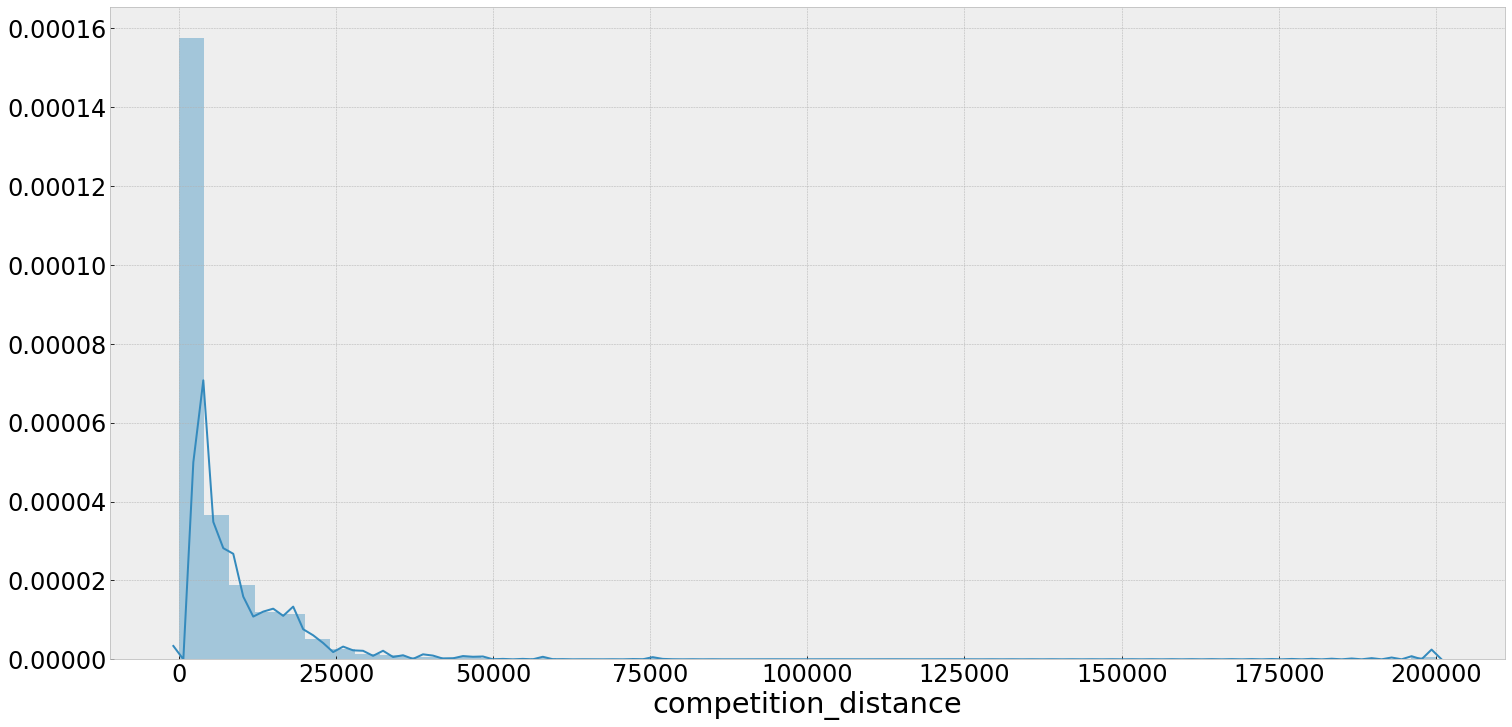

In [19]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes 

In [20]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

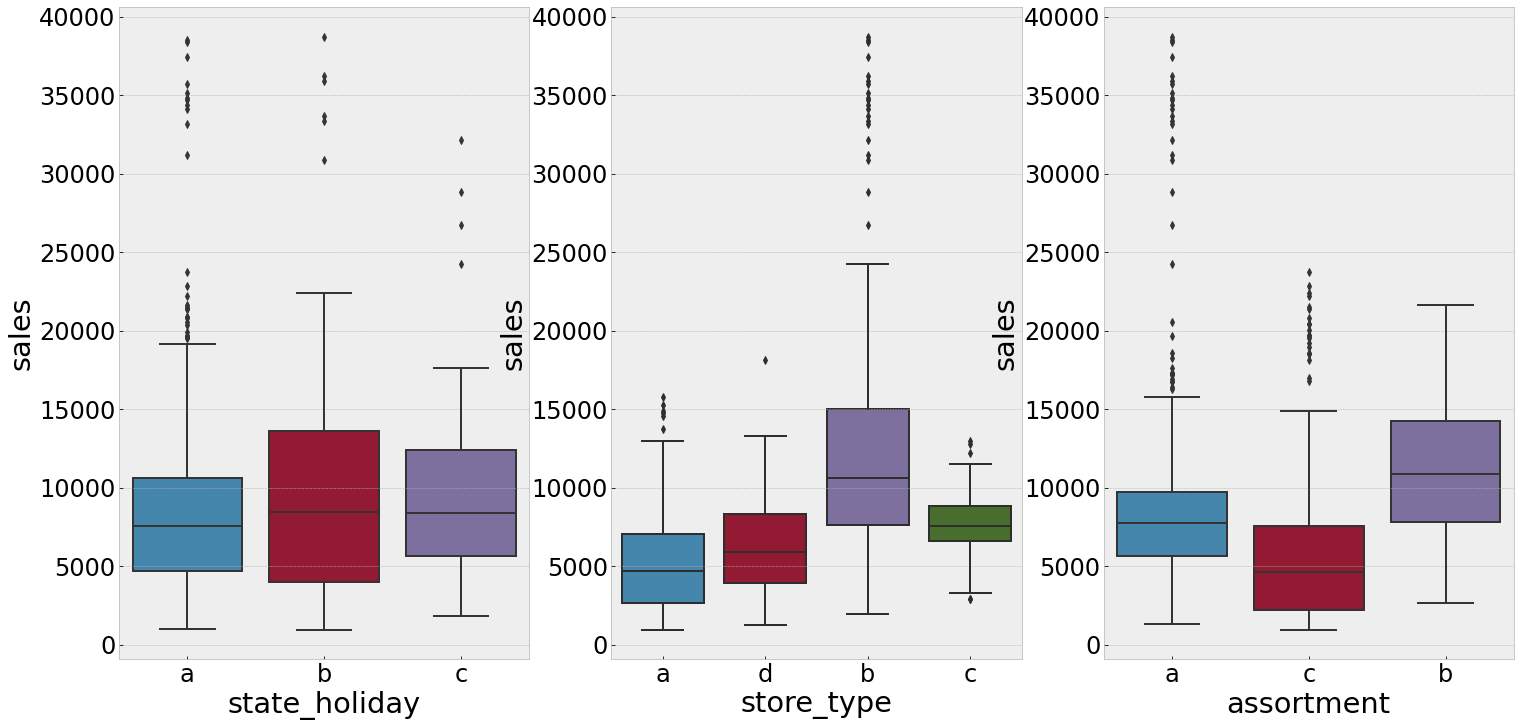

In [21]:
aux1 = df1[(df1['state_holiday'] !='0') & (df1['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday',y='sales',data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type',y='sales',data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux1)

# 2.0 Feature Engineering

In [22]:
df2 = df1.copy()

## 2.1 Mapa mental de hipóteses

<img src="img/MindMapHypotesis_.png">

In [23]:
Image('img/MindMapHypotesis.png')

FileNotFoundError: No such file or directory: 'img/MindMapHypotesis.png'

FileNotFoundError: No such file or directory: 'img/MindMapHypotesis.png'

<IPython.core.display.Image object>

## 2.2 Criação de Hipóteses

### 2.2.1 Hipóteses Loja

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimento deveriam vender mais.

**5.** Lojas com competidores mais distantes deveriam vender mais.

**6.** Lojas com competidores à mais tempo deveriam vender mais.

### 2.2.2 Hipóteses Produto

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas que expoem mais os produtos nas vitrines deveriam vender mais.

**3.** Lojas que tem preços menos nos produtos deveriam vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agressivas (desconto maiores) deveriam vender mais.

**6.** Lojas com promoções ativas por mais temmpo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês

**5.** Lojas deveriam vender menos aos finais de semana

**6.** Lojas deveriam vender menos durantes feriados escolares

## 2.3 Lista de hipótese final

As hipóteses foram escolhidas com base nos dados que já foram obtidos e podem ser usados para estudo. Para que outras hipóteses sejam testadas é necessário que haja uma coleta maior de dados de diferentes áreas da empresa

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais distantes deveriam vender mais.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais temmpo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês

**11.** Lojas deveriam vender menos aos finais de semana

**12.** Lojas deveriam vender menos durantes feriados escolares

## 2.4 Feature Engineering

In [24]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since']=df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1),axis =1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype('int64')

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ( (df2['date'] - df2['promo_since'])/7 ).apply(lambda x: x.days).astype('int64')

# assortment 
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x =='a' else 'extra' if x =='b' else 'extended' )
 
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x =='a' else 'easter_holiday' if x =='b' else 'christmas' if x =='c' else 'regular_day')



In [25]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Filtragem de Variáveis

In [26]:
df3 = df2.copy()

In [27]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das linhas

In [28]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]
# as linhas cuja coluna open é igual a zero, já que não contribui para obtenção de conhecimento dos dados.

## 3.2 Seleção das colunas

In [29]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop,axis = 1)

# Não tem os dados de costumers no momento da predição, é uma restrição de negócio.

In [30]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 Análise exploratória dos dados

In [31]:
df4 = df3.copy() 

## 4.1 Análise Univariada

### 4.1.1 Response Variable

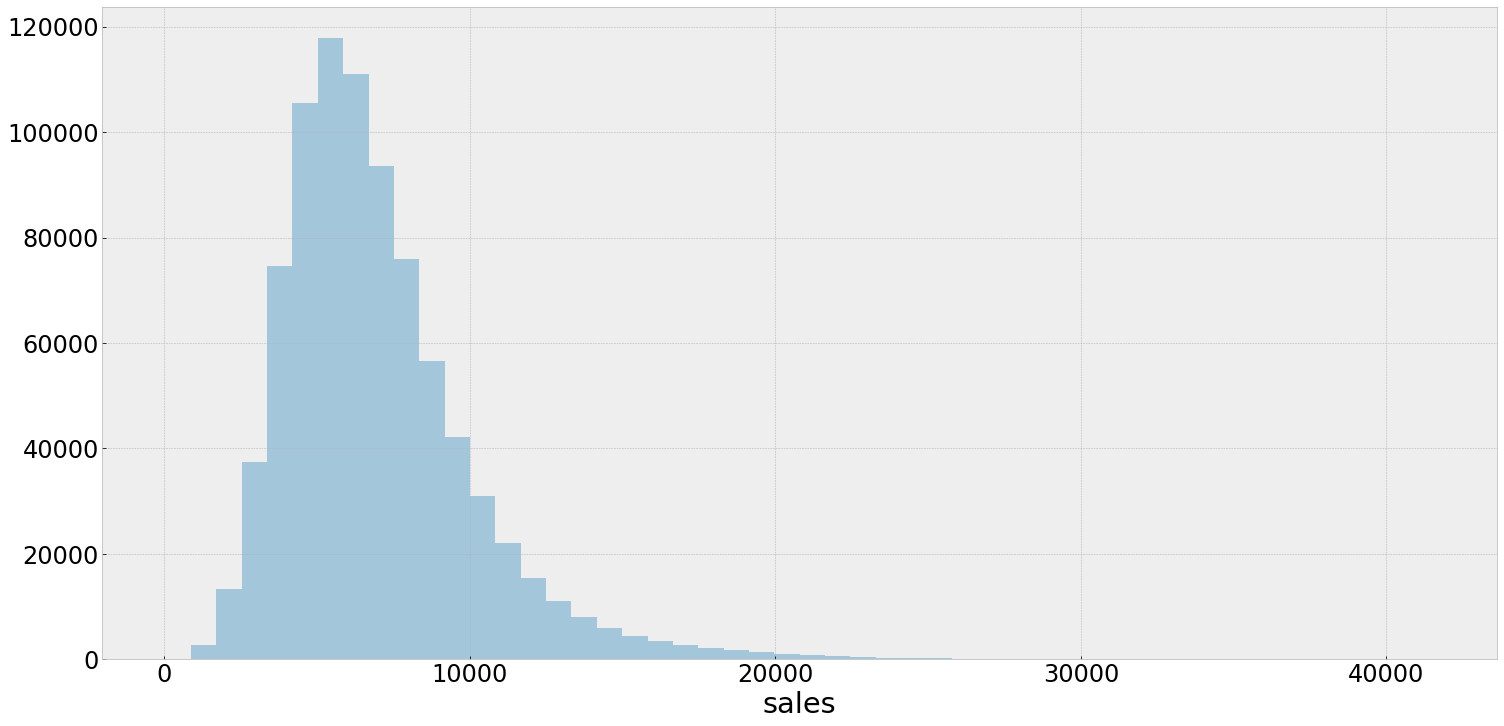

In [32]:
sns.distplot(df4['sales'], kde =False)

# quanto mais normal for a distribuição, melhor será os modelos de ML

### 4.1.2 Numerical Variable

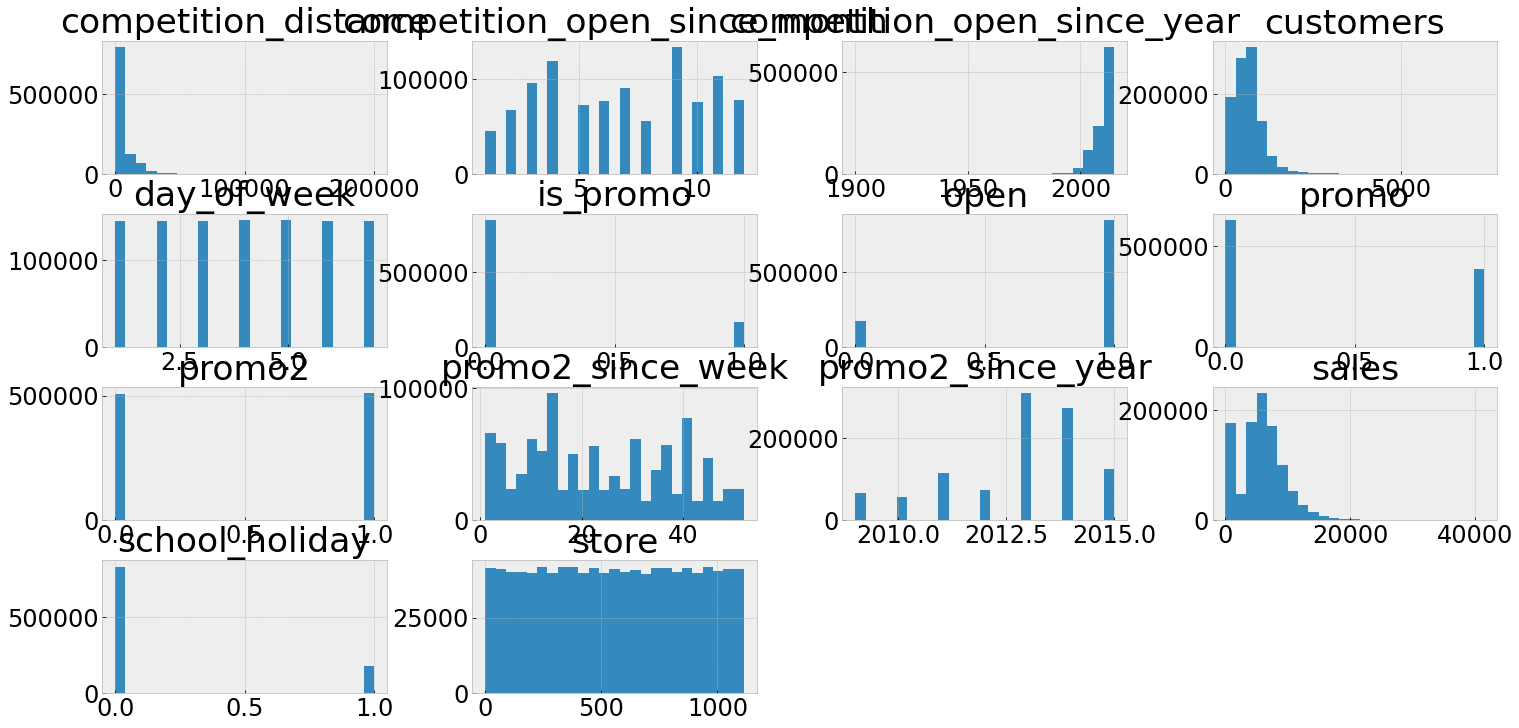

In [33]:
num_attributes.hist(bins = 25);

### 4.1.3 Categorical Variable

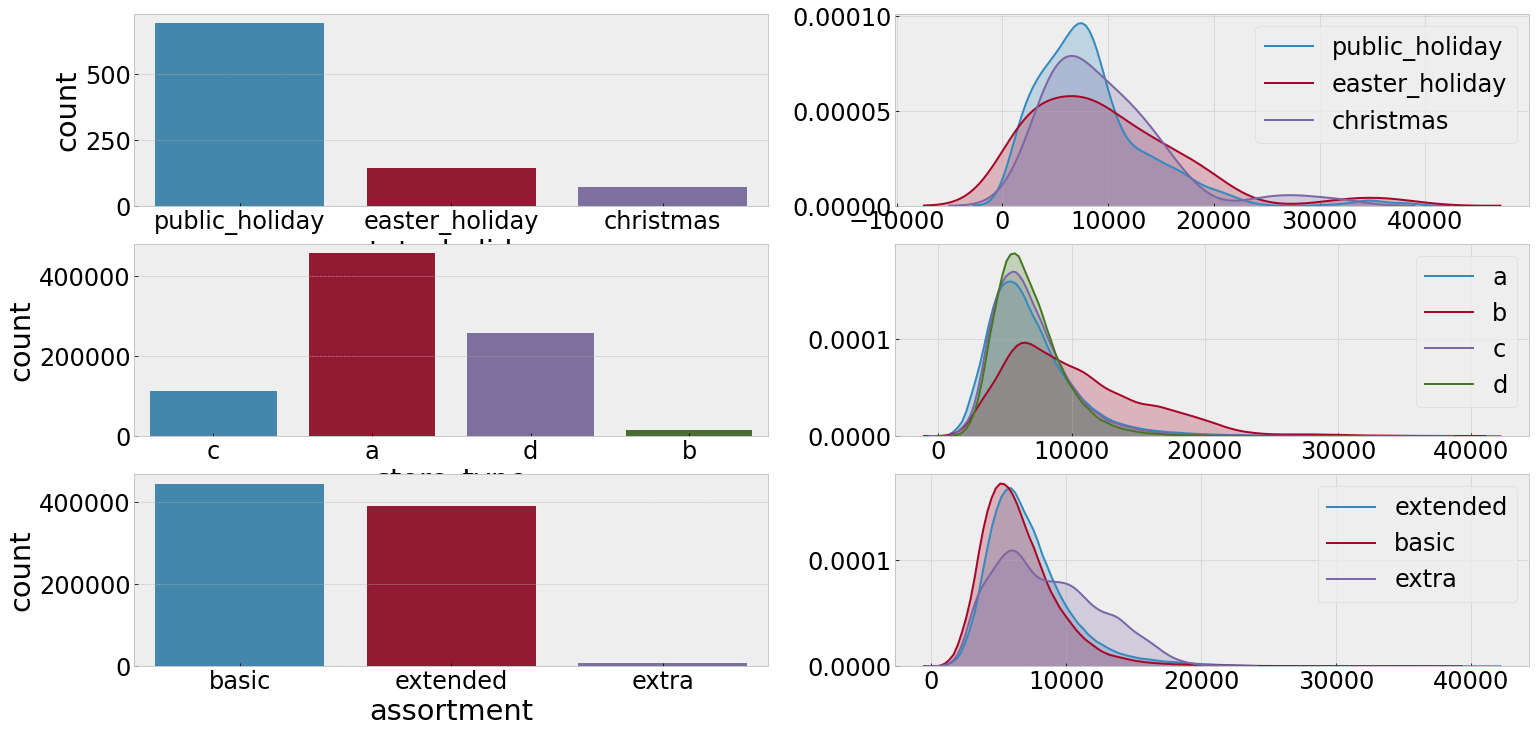

In [34]:
# state_holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', shade = True)

#store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', shade = True)

# assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade = True)

## 4.2 Análise Bivariada

### **H1** Lojas com maior sortimento deveriam vender mais.
**Verdadeira**


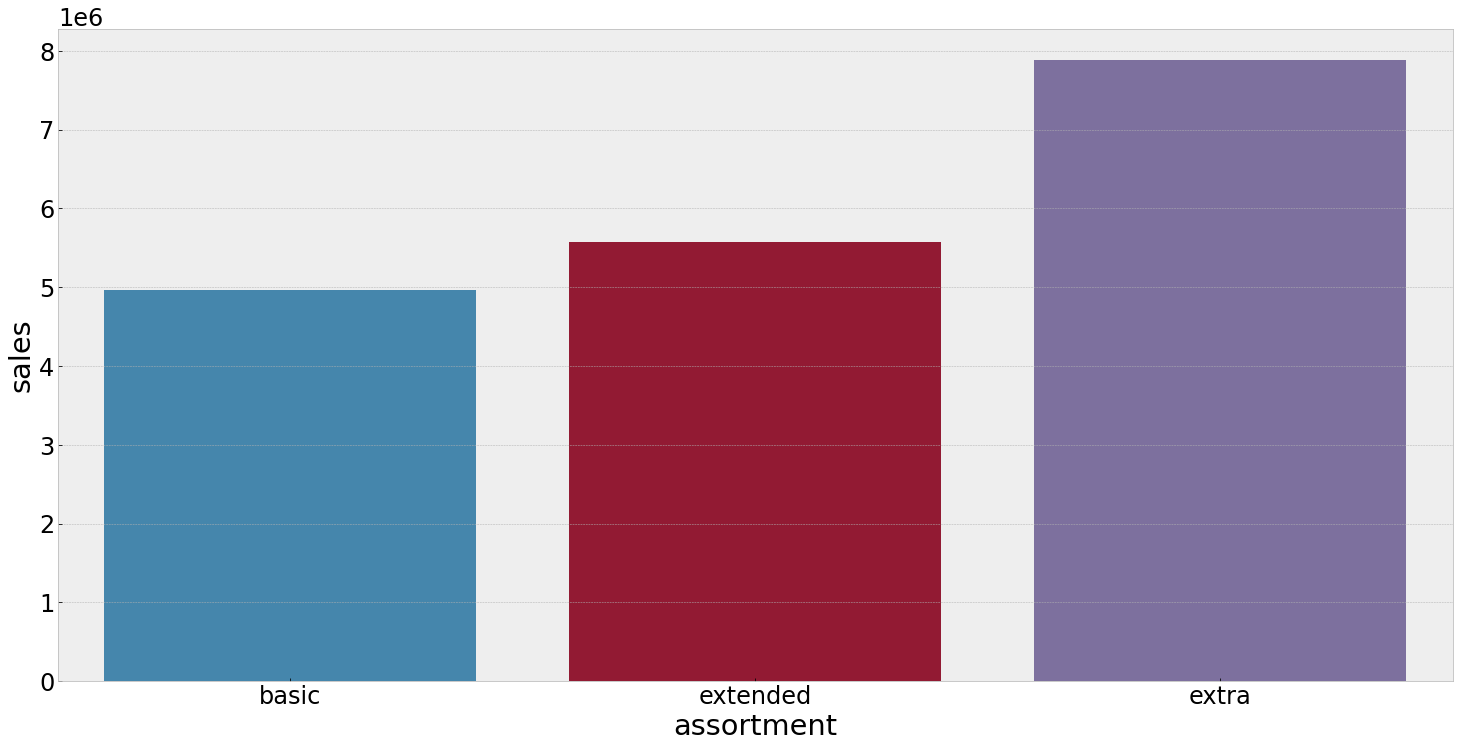

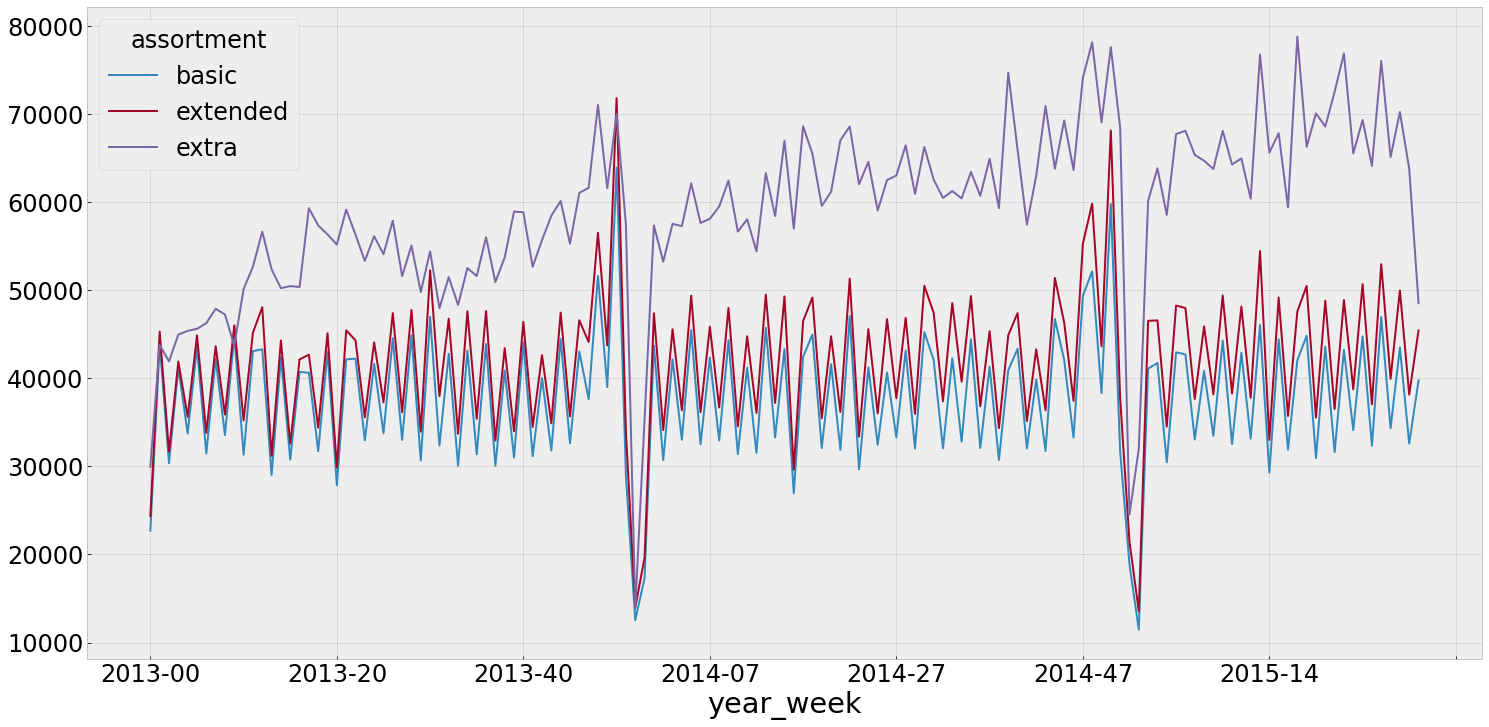

In [35]:
aux1 = df4[['assortment','sales','store']].groupby(['store','assortment']).sum().reset_index().groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data = aux1)  # mostra média de vendas das loja por assortment

# QUANTIDADE DE VENDAS MÉDIAS POR LOJA EM EXTRA: 7.882.923 (ao longo do tempo total)
# QUANTIDADE DE VENDAS MÉDIAS POR LOJA EM BASIC: 4.967.538 (ao longo do tempo total)

aux2 = df4[['year_week','assortment', 'sales','store']].groupby(['year_week','assortment','store']).sum().reset_index().groupby(['year_week','assortment']).mean().reset_index()
aux2.pivot(index='year_week', columns='assortment', values = 'sales').plot()

# quantidade de vendas médias por loja em cada dia, separados pro assortment 


### **H2** Lojas com competidores mais distantes deveriam vender mais.
**Falso** Há uma correlação próximo de zero, mas negativa, o que mostra que quanto mais distante vendem menos, de maneira não significativa.

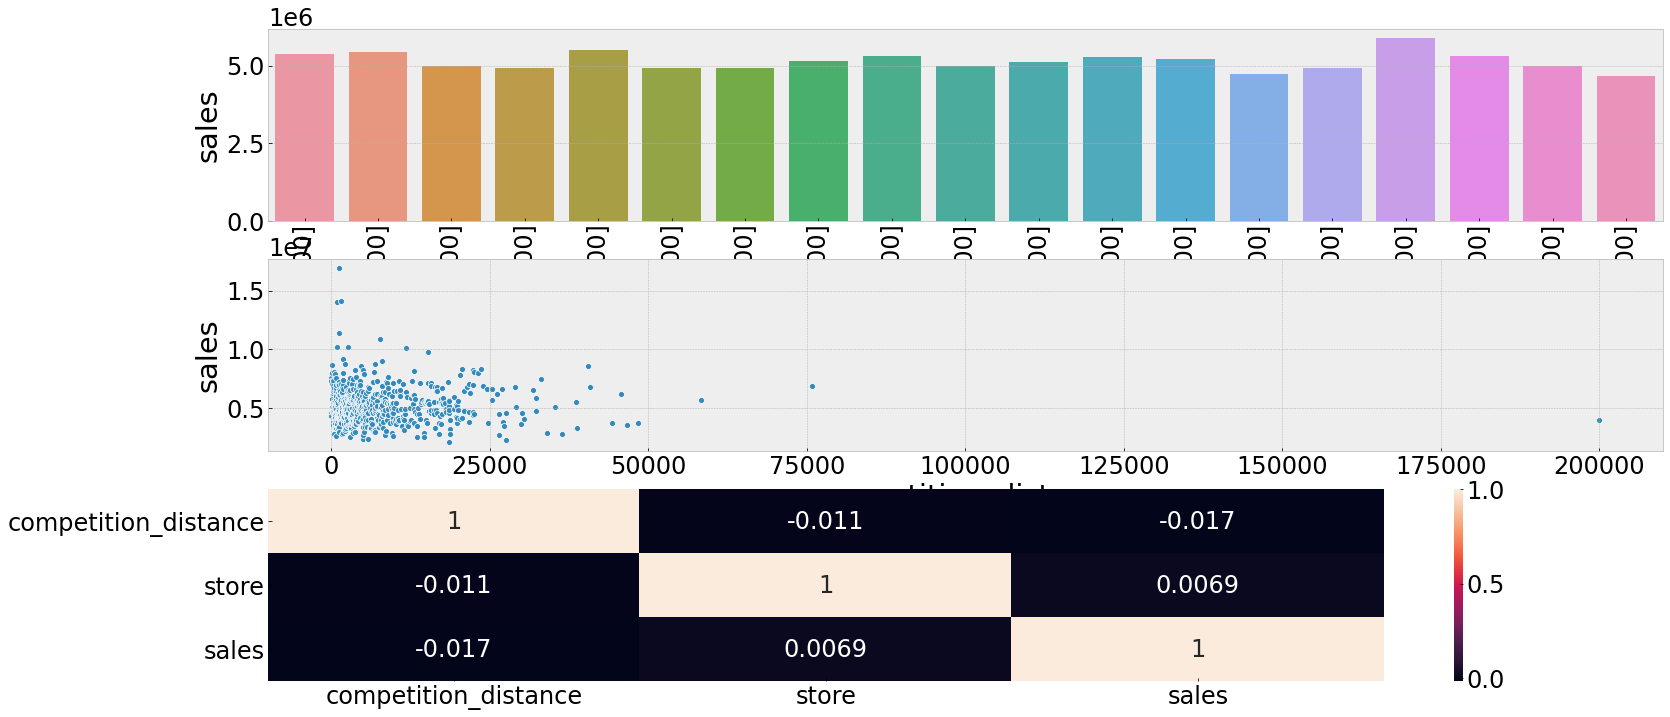

In [36]:
aux1 = df4[['competition_distance','sales','store']].groupby(['store','competition_distance']).sum().reset_index().groupby('competition_distance').mean().reset_index()

bi = list(np.arange(0,20000,1000))

aux1['competition_distance_binned'] = pd.cut(x = aux1['competition_distance'], bins=bi)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').mean().reset_index()

subplot(3,1,1)
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation = 90);

subplot(3,1,2)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

subplot(3,1,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot=True)

### **H3** Lojas com competidores à mais tempo deveriam vender mais.
**Falso** lojas com competidores há mais tempo vendem levemente menos.
Há alguns outliers que deixam a correlação positiva, mas deveria ser negativa

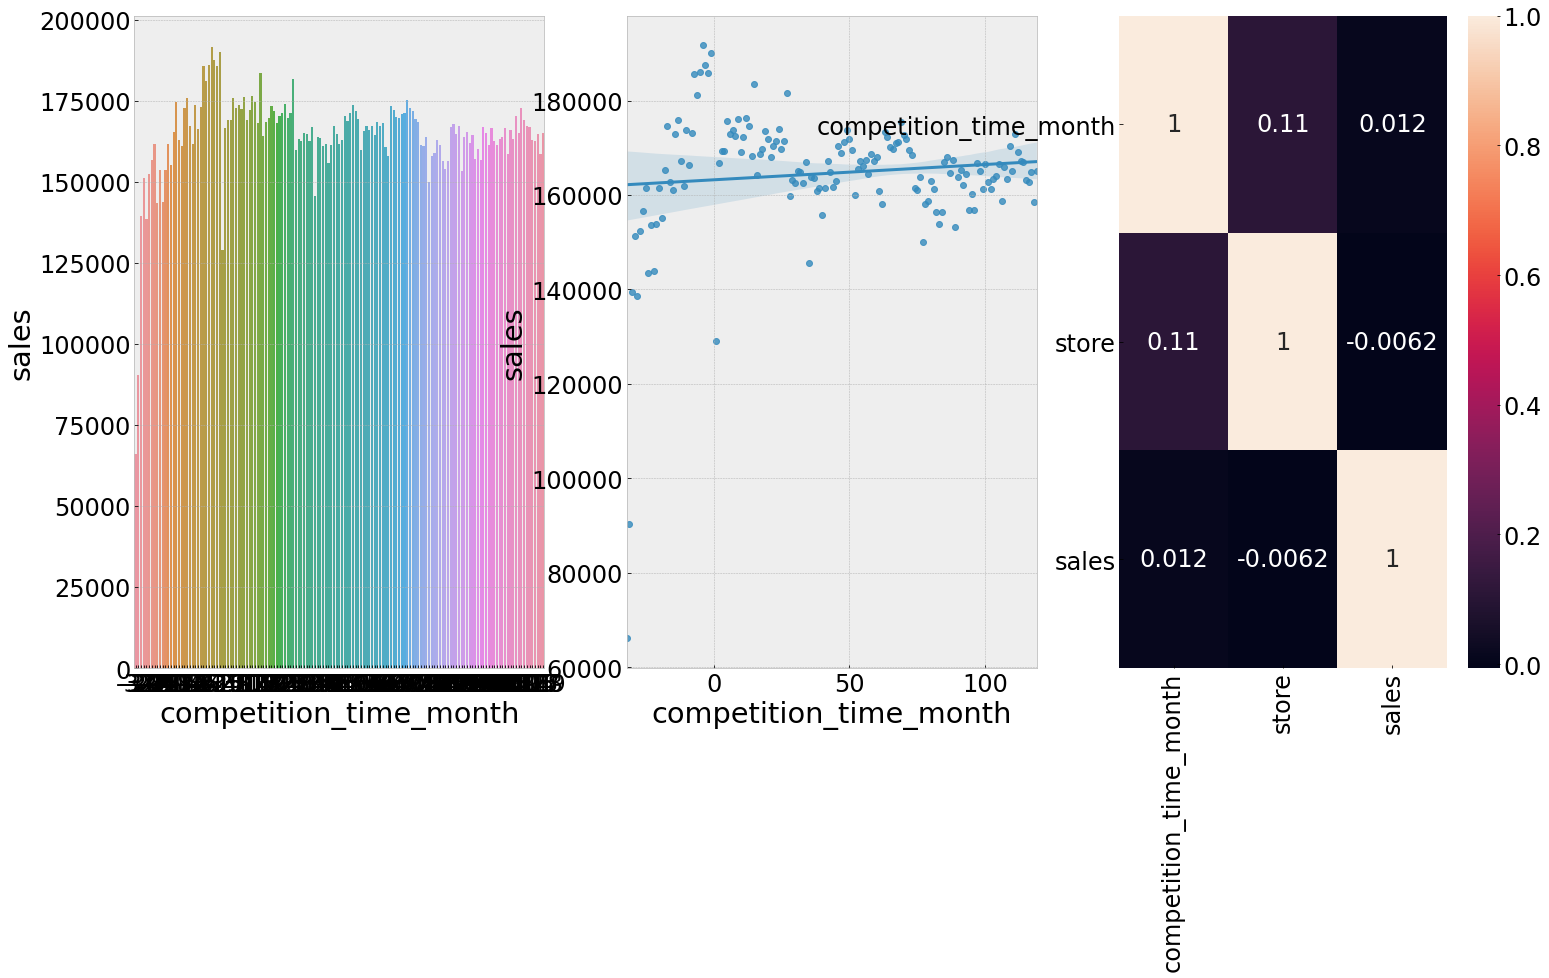

In [37]:


aux1 = df4[['competition_time_month', 'sales','store']].groupby(['store','competition_time_month']).sum().reset_index().groupby('competition_time_month').mean().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]

plt.subplot(1,3,1)
sns.barplot(x='competition_time_month', y ='sales', data = aux2)
#plt.xticks(rotation = 90);

plt.subplot(1,3,2)
sns.regplot(x='competition_time_month', y='sales', data = aux2)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### **H4.** Lojas com promoções ativas por mais temmpo deveriam vender mais. DO H4 ATÉ O H6 ACHO QUE ESTÁ ERRADA POIS NÃO CONSIDERA SALES MÉDIO/LOJA E SIM SALES ABSOLUTO (PODE TER UM PICO DE SALES NÃO PQ A LOJA VENDE MAIS, MAS SIM PQ TEM UMA QUANTIDADE MAIOR DE LOJAS COM AQUELA QTDE DE DIAS DE PROMOÇÃO ): REFAZER

**Falsa** Lojas com promoções ativas por mais tempo vendem menos, depois de um certo período de promoção.



<ipython-input-41-bdb5765bdf80>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(grid[1,0])


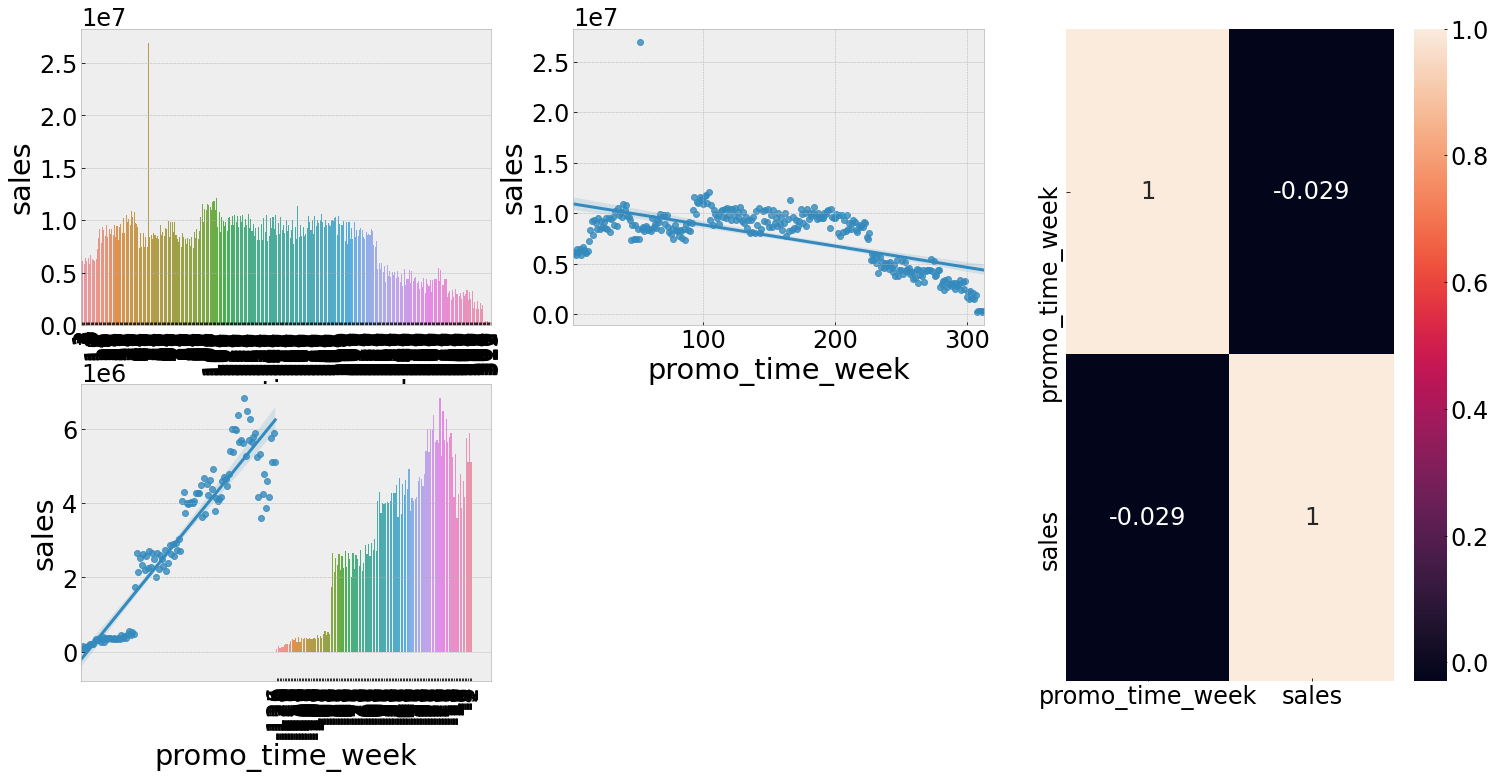

In [41]:
aux1 = df4[['promo_time_week', 'sales']].groupby ('promo_time_week').sum().reset_index()

grid = GridSpec(2,3)

plt.subplot(grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot(x = 'promo_time_week', y='sales', data=aux2);
plt.xticks(rotation = 90);

plt.subplot( grid[0,1])
sns.regplot(x='promo_time_week', y='sales', data = aux2);

plt.subplot(grid[1,0])
aux3 = aux1[aux1['promo_time_week'] <0] # promo regular
sns.barplot(x='promo_time_week', y='sales', data = aux3);
plt.xticks(rotation = 90);

plt.subplot(grid[1,0])
sns.regplot(x='promo_time_week', y='sales', data = aux3);

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais.</s>



### **H6.** Lojas com mais promoções consecutivas deveriam vender mais.
**Falsa** Lojas com mais promoções consecutivas vendem menos

In [47]:
a = df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
a.sort_values(by=['sales'], inplace=True)
a

,promo,promo2,sales
1,0,1,1289362241
3,1,1,1472275754
0,0,0,1482612096
2,1,0,1628930532


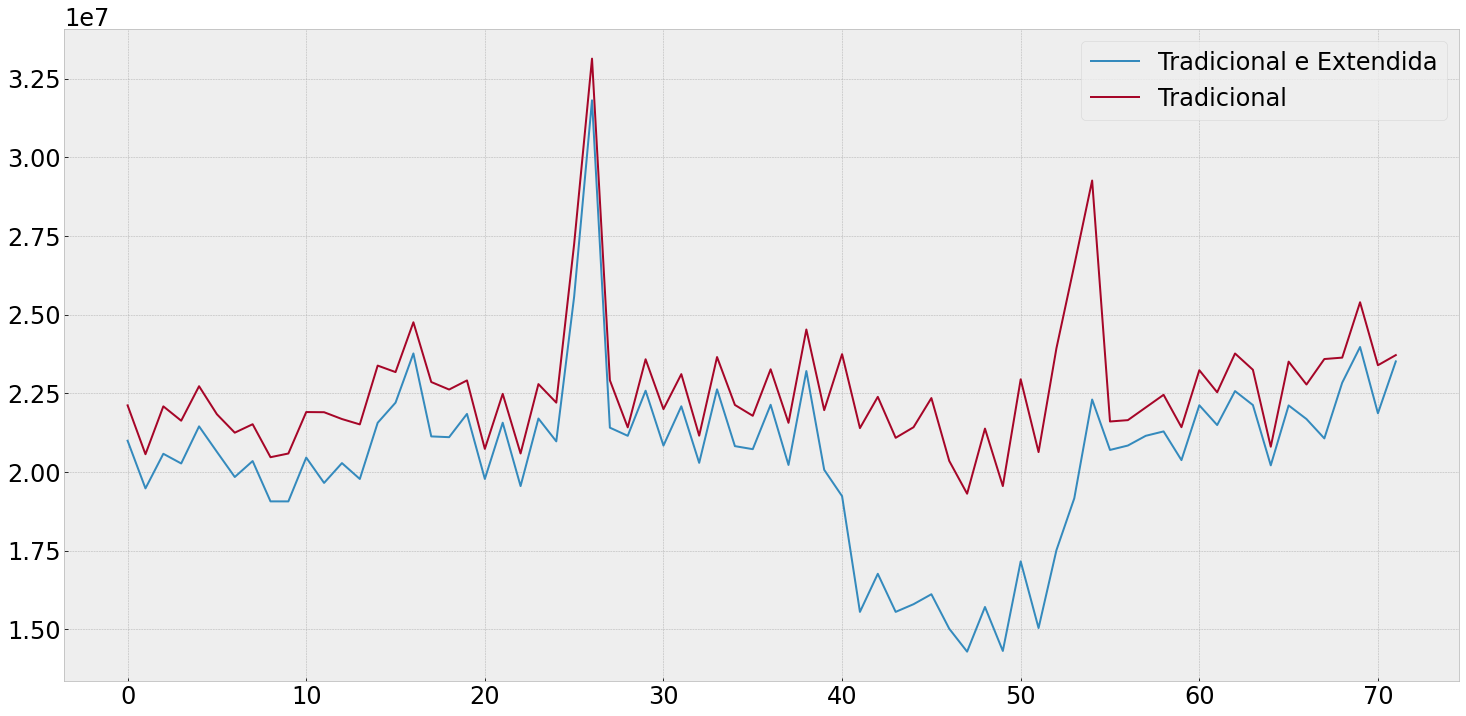

In [48]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Tradicional e Extendida', 'Tradicional']);

### **H7.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**Falsa** Lojas abertas durante o feriado de natal vendem menos que nos outros feriados

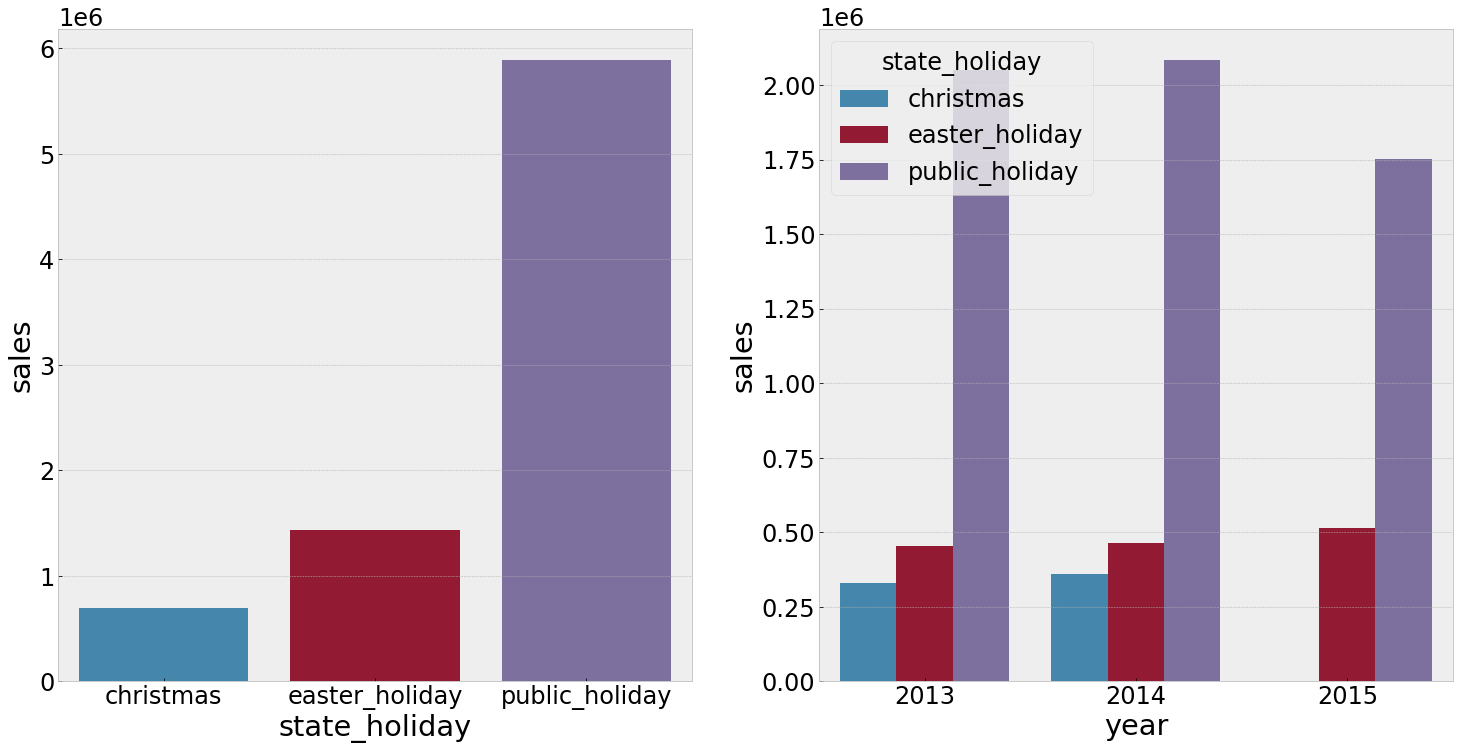

In [51]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(1,2,1)
aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data = aux1);

plt.subplot(1,2,2)
aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales',hue = 'state_holiday', data = aux2);

### **H8.** Lojas deveriam vender mais ao longo dos anos.
**Verdadeira**


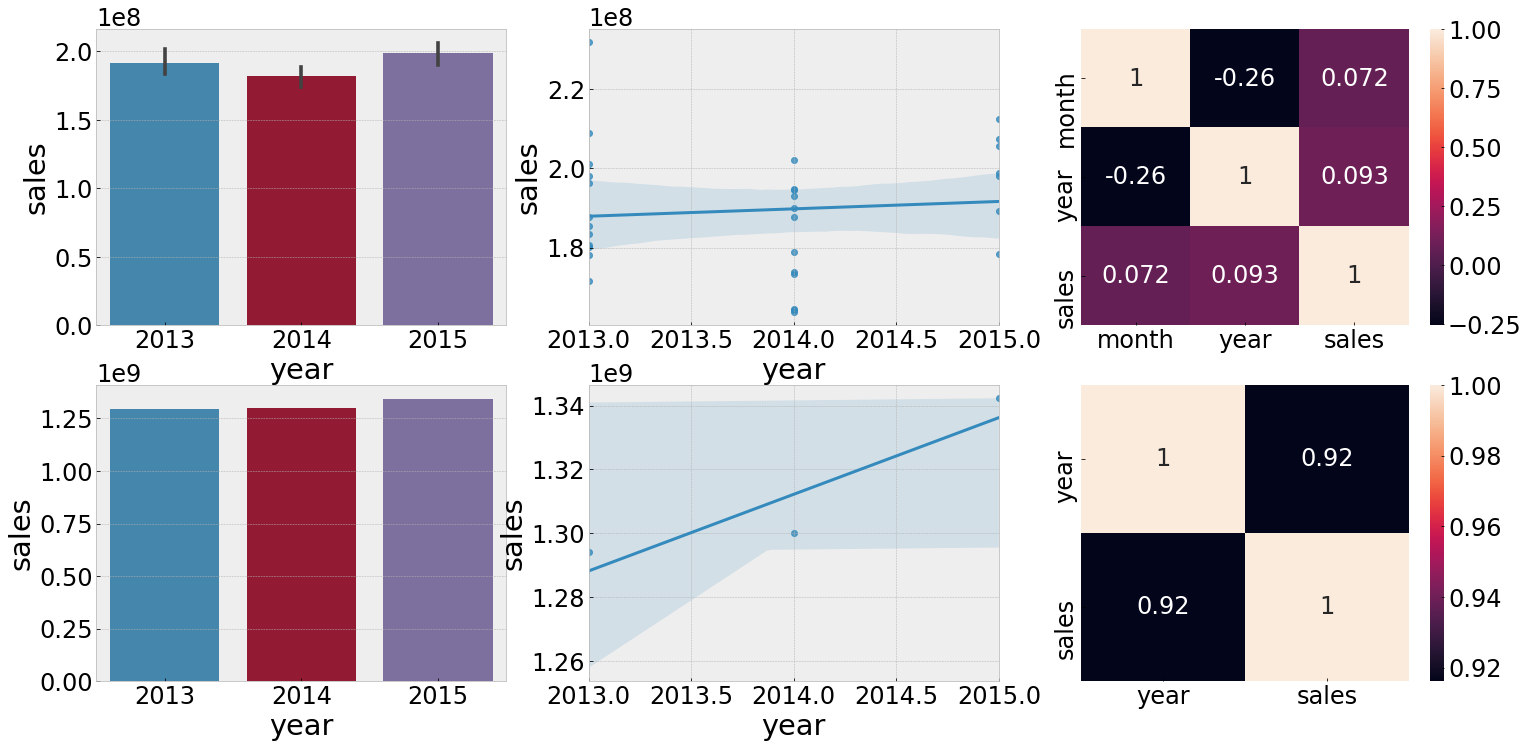

In [59]:
aux1 = df4[['month','sales','year']].groupby(['month','year']).sum().reset_index()

plt.subplot(2,3,1)
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot(2,3,2)
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot(2,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
#venda média/mês a cada ano

max_week = max(df4[df4['year'] == 2015 ]['week_of_year'])-1
aux2 = df4[df4['week_of_year'] <= max_week ][['year', 'sales']].groupby( 'year' ).sum().reset_index()


plt.subplot( 2, 3, 4 )
sns.barplot( x='year', y='sales', data=aux2 );

plt.subplot( 2, 3, 5 )
sns.regplot( x='year', y='sales', data=aux2 );

plt.subplot( 2, 3, 6 )
sns.heatmap( aux2.corr( method='pearson' ), annot=True );
# total de vendas em cada ano até a quantidade de semanas que temos em 2015

In [60]:
aux2.head(13)

,year,sales
0,2013,1294305297
1,2014,1300114206
2,2015,1342268720


### **H9.** Lojas deveriam vender mais no segundo semestre do ano.
**Falso** não há grandes alterações


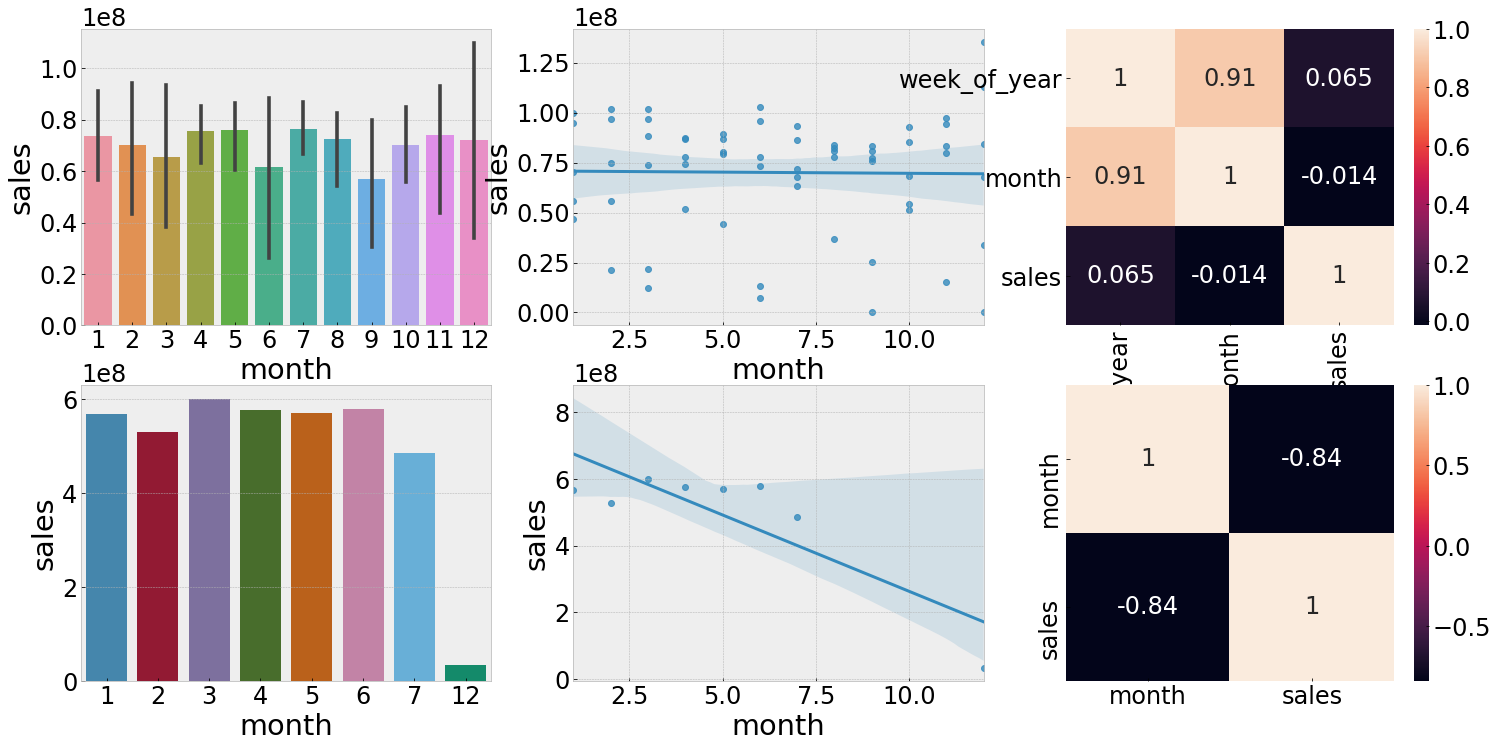

In [66]:
ax = df4[df4['year'] != 2015]
aux1 = ax[['week_of_year','sales','month']].groupby(['week_of_year','month']).sum().reset_index()

plt.subplot(2,3,1)
sns.barplot(x='month', y='sales', data=aux1)

plt.subplot(2,3,2)
sns.regplot(x='month', y='sales', data=aux1)

plt.subplot(2,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
#venda média/mês durante os anos de 2013 e 2014, 2015 não possui dados a partir da 30º semana do ano



In [67]:
aux2.head(10)

,month,sales
0,1,566728724
1,2,528734410
2,3,599831906
3,4,575895295
4,5,569248217
5,6,578112775
6,7,484557137
7,12,33579759


### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mês
**Falso** vende menos


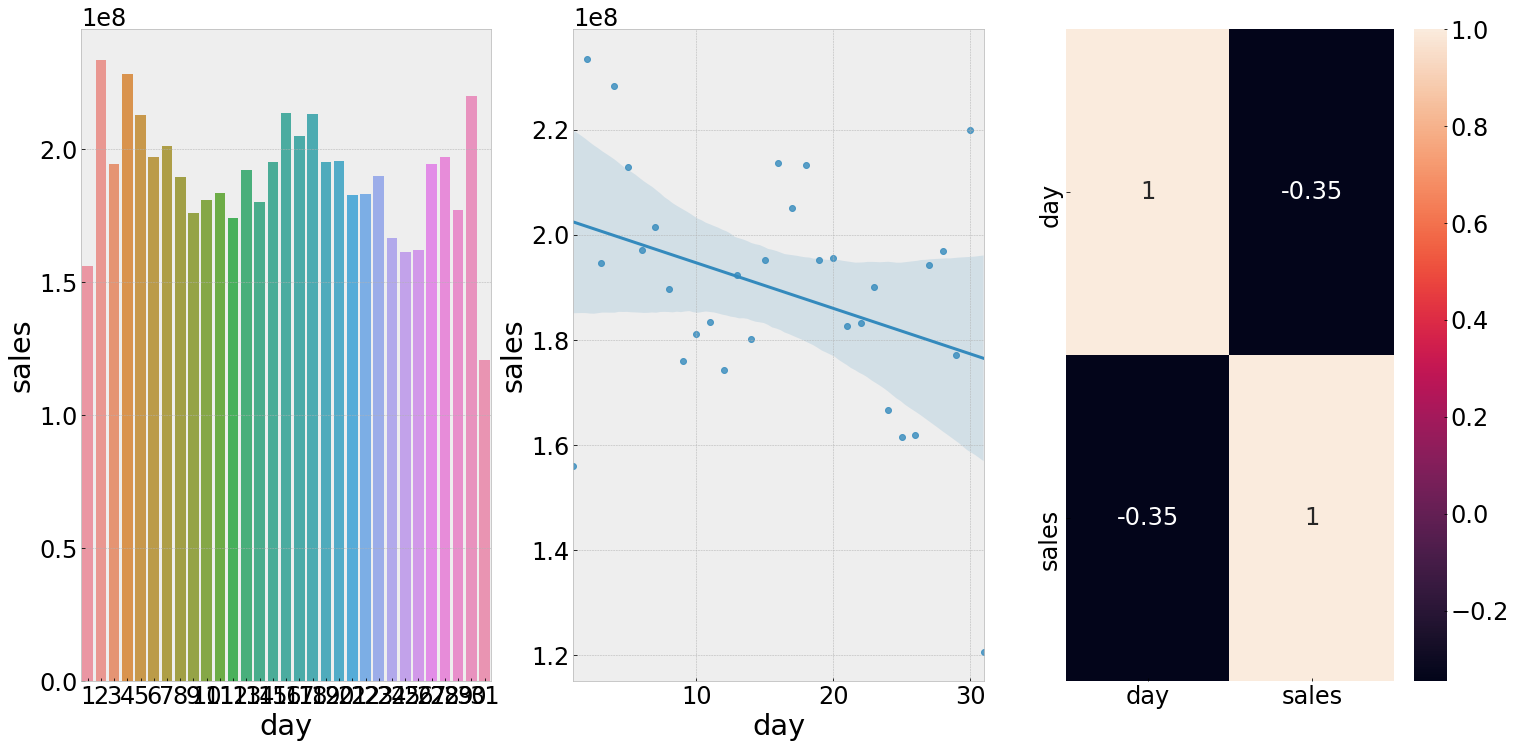

In [69]:
aux1 = df4[['sales','day']].groupby(['day']).sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.regplot(x='day', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)


### **H11.** Lojas deveriam vender menos aos finais de semana
**Verdadeiro**


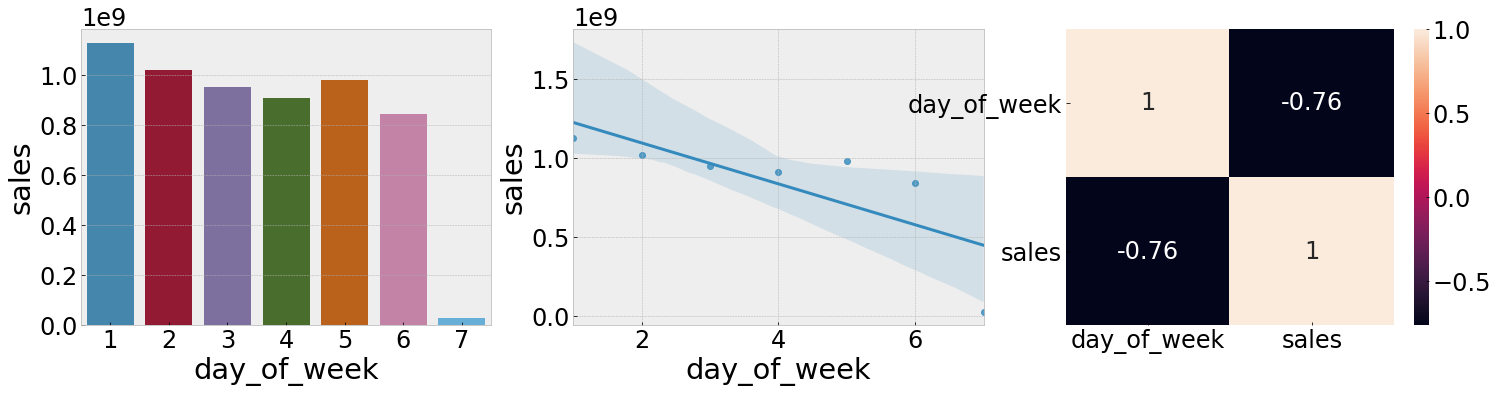

In [70]:
aux1 = df4[['sales','day_of_week']].groupby(['day_of_week']).sum().reset_index()

plt.subplot(2,3,1)
sns.barplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(2,3,2)
sns.regplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(2,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### **H12.** Lojas deveriam vender menos durantes feriados escolares

**NÃO ACHO NECESSÁRIO VALIDAR ESTA HIPÓTESE, TALVEZ NO PRÓXIMO CICLO**

## 4.3 Análise Multivariada

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
